<img src="https://lh3.googleusercontent.com/fife/ALs6j_E0Z5A8iyPVEbhgKKR3r3AXd_Ia8ph0PCMYjIkjnFQPP58LhU6yJDr_qH0-eo_wqHec696CXpsCfCl_q2L4IswhHoGcJ7CPum3yvczEJrTG8nLiUb5Fw7KcUkSAxCAms9se1N5FNa82XXaRG1GBb-gWpT-pvWv_O7sQSsbHX9XwUMWTJzGjMO0A6PjIATrKb2JTqygVJksoNcXRULES-qcHNn_AkURzpRbDyMUczAVZdkOoW1Xj7LYhA1X1gGa6R3bot9benJtA1P-kCGyKnojGEicitHrsnqtrYVsD_tSfFRIczv4zAf_oFhdZQmu4XAZhgBCY1aZba4gR9iXtP4lUhlmFhyIM3LpD0bkZpHgUhmxj-FtL3DQQ1c3pLTb1TqBUUj-4SJiOTcsN4Flcta0QXksAfUSOCYIrECZc1JYueyIoBiRriIV_1DUxSbxkUgtu4vltVvHpet_MhtdEtSobomyHKAaVqtLCRWBuN75N_g9KEXA82tPjaui9Y7ah50Zh2oo_FNTejRhzwhKEOxUA4MFN2T4ffMZUjfpzLh0xHSRlg1r5FnNRIvMinqI7abYon4B0L9euC4bbVOArlCZQ9eOzjXbIqOb6wvC8UIY9L_tAWVRq83IM5_G7uN9G4WwuP7c-CMwshCD2eX6qvw7DCOS3j8EgobpRA-LPkcKGFprXHwQZmZxxvggB7GPfmVyqfn4I-RDlTJZhqtQwa5XXTTT8tOCqxdAciYnIEo2zrWCwWK0v96qJbYNKCKzqoR1C_pcUnTgzNWHyGqKgza0vWI3rneA25BFIq2SHNli9knkG3J568E40RhnT8KlCQ8oaf2cCJ-lPFl3KZiwoFGtHLmBm0B8W5LxolNbfr4KWxTDY52WvdjddodOpIC7LuDzI496j3gJL1kdnGlfB64BQYx9_KXL2GGCoTIwW6-Sllx7AbEkZ1gPKDO769g3CqNQfJa7RbI-WxPPIxfZQk9adDs3UjYyL_AfjBJpZRSs_P4uVjrobzEDKOzK3qpCtCwtqdElwC1QXp57X4GGZb9VjwkJeJYxpNQglo3zwST0VBim9vbPeSMEi6D4i1fSns4w-7M53Kx33JpnzpYtMbj2hR2dmQ8As1uzmRccv-yi6-jpQBUGHIwDq4k-D47w9f--mcA5vxzJT62SRhfL2hnQg9EkMRESqlBAvHBc9AQCROCBHtf-qeFZVnlVvaRBRkahilGM1T8RZekK374iJnd1GlZ35fH1pEJ3bICvDqHB8o5Ph1Y-zDEaJez4m3rxUN1keHr5tAK3bLpXTvdWUkE7M17grormgjasm03J3gaNI-OxyIqhqHhQHd7DQ0Crm52Ve-iA-3HCUNaWzJh0mRJfAYZKqM1b8nqeoktxnSm9L_6f6G7dzZ2ybTUuXBOGdgwzTRI4xy5Y8s-VEFzyCkXjmseJRdVHVU6gUR3C39QZO0nEPqgjreOC35nFzxzX7Em0YhXgT5un21dHatAADsNZg-HOi4ZcmOIPuEDqBW9M14Rqexnh_WROIeWB5w0O9_nW1A0z6P8W80w_BZDjgw4Rb599AJTdlHt4qZowgU4P-8yqOAsyk6rLeMybLw7nsyvSgCYUcIS0Qq7SCnW4ie_R1j5inZcGbsgZb3xxHhrRnT5ohk_fAvBCelM5iSRdkYac5CGXW-aMizvcS09B8yw=w1872-h958" width="1000">

In [1]:
%%capture
# Instalar y actualizar bibliotecas necesarias
!pip install gdown
!pip install roboflow
!pip install ipywidgets
!pip install ultralytics

In [2]:
# Importar bibliotecas a usar y deshabilitar WanDB

import os
import yaml
import gdown
import wandb
import shutil
import requests
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image

os.environ['WANDB_DISABLED'] = 'true'
import wandb

In [3]:
# Descargar repositorio de aisladores

rf = Roboflow(api_key="EKato538chIPhManlH2u")
project = rf.workspace("universidad-nacional-6lud5").project("hard-hat-sample-88tip")
version = project.version(3)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hard-Hat-Sample-3 in yolov9:: 100%|██████████| 491/491 [00:00<00:00, 6391.22it/s]


In [4]:
# Creación del directorio de las partes de la base de datos

data = {
    'path': '/kaggle/working/Hard-Hat-Sample-3',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': { 0: 'Head', 1: 'Helmet', 2: 'Person'},
    'roboflow': {
        'license': 'Public Domain',
        'project': 'hard-hat-sample-88tip',
        'url': 'https://app.roboflow.com/universidad-nacional-6lud5/hard-hat-sample-88tip/3',
        'version': 3,
        'workspace': 'universidad-nacional-6lud5'}
}

# Especificar el directorio del archivo
file_path = '/kaggle/working/Hard-Hat-Sample-3/data.yaml'

# Escribir la información sobre el archivo YAML
with open(file_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

print(f"Archivo YAML '{file_path[-9:]}' creado exitosamente")

Archivo YAML 'data.yaml' creado exitosamente


In [5]:
# Entrenar YOLOv9 para detección de aisladores

# Carga de modelo preentrenado
model = YOLO('yolov10s.pt') 

# Entrenar el modelo
results = model.train(data='/kaggle/working/Hard-Hat-Sample-3/data.yaml', epochs=20, imgsz=640, device=[0,1])

100%|██████████| 15.9M/15.9M [00:00<00:00, 138MB/s]


Ultralytics YOLOv8.2.98 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
                                                      CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/kaggle/working/Hard-Hat-Sample-3/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

100%|██████████| 755k/755k [00:00<00:00, 14.6MB/s]
2024-09-20 06:57:10,614	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-09-20 06:57:11,828	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1    137728  ultralytics

wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=3
Transferred 607/619 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 73.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Hard-Hat-Sample-3/train/labels... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<00:00, 1135.33it/s]


train: New cache created: /kaggle/working/Hard-Hat-Sample-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: New cache created: /kaggle/working/Hard-Hat-Sample-3/valid/labels.cache


val: Scanning /kaggle/working/Hard-Hat-Sample-3/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 1177.55it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       3.2G      4.396      14.92      3.615          6        640: 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]


                   all         20         65       0.49      0.141      0.153     0.0887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.16G      3.157      7.189      2.797          4        640: 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]


                   all         20         65      0.556      0.363      0.262      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.16G      3.085      5.119      2.631         12        640: 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]


                   all         20         65      0.743      0.354      0.405      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.18G       2.94       3.97      2.545          2        640: 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]


                   all         20         65      0.396      0.481       0.49      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.16G      2.934      3.445      2.719          4        640: 100%|██████████| 14/14 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]


                   all         20         65       0.48      0.435      0.472      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.18G      2.912      2.828      2.634          2        640: 100%|██████████| 14/14 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]


                   all         20         65      0.568      0.207      0.329      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.17G       2.87      3.014      2.701          2        640: 100%|██████████| 14/14 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]


                   all         20         65      0.488      0.535      0.542      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.18G      2.624      2.767       2.36          0        640: 100%|██████████| 14/14 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]


                   all         20         65      0.442      0.381      0.434      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.17G      2.877      2.476      2.707          2        640: 100%|██████████| 14/14 [00:02<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]


                   all         20         65      0.548      0.448      0.485      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       3.2G      2.807      2.581      2.655          1        640: 100%|██████████| 14/14 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]


                   all         20         65      0.921      0.419      0.479      0.284
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.18G      2.833      2.163      2.541          7        640: 100%|██████████| 14/14 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]


                   all         20         65      0.868      0.419      0.468      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.18G      2.515      1.828      2.405          7        640: 100%|██████████| 14/14 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]


                   all         20         65      0.863      0.432      0.458      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.17G      2.217      1.618      2.345          4        640: 100%|██████████| 14/14 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]


                   all         20         65      0.831      0.485      0.495      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.18G      2.308      1.681      2.318          1        640: 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]


                   all         20         65      0.527      0.425      0.496      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.17G      2.232      1.568      2.289          1        640: 100%|██████████| 14/14 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]


                   all         20         65      0.612      0.409      0.515      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.18G      2.257       1.58      2.341          9        640: 100%|██████████| 14/14 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]


                   all         20         65      0.817      0.463      0.525      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.17G      2.201      1.371      2.251          2        640: 100%|██████████| 14/14 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]


                   all         20         65      0.975      0.501      0.592      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.18G      2.293      1.462       2.41          3        640: 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]


                   all         20         65      0.527      0.537        0.6      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.18G      1.974      1.188      2.212          5        640: 100%|██████████| 14/14 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]


                   all         20         65      0.546       0.52      0.614      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.17G       1.88      1.253      2.212          1        640: 100%|██████████| 14/14 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]


                   all         20         65      0.539      0.556      0.622       0.43

20 epochs completed in 0.033 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 16.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.98 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
                                                      CUDA:1 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 293 layers, 8,037,282 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]


                   all         20         65      0.538       0.56      0.622       0.43
                  Head          3         18      0.781      0.791      0.866      0.585
                Helmet         17         45      0.834      0.889      0.925      0.686
                Person          1          2          0          0     0.0745     0.0201
Speed: 0.2ms preprocess, 6.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▂▃▄▆▇▇██▇▇▆▅▅▄▄▃▃▂▂▁
wandb:                  lr/pg1 ▂▃▄▆▇▇██▇▇▆▅▅▄▄▃▃▂▂▁
wandb:                  lr/pg2 ▂▃▄▆▇▇██▇▇▆▅▅▄▄▃▃▂▂▁
wandb:        metrics/mAP50(B) ▁▃▅▆▆▄▇▅▆▆▆▆▆▆▆▇████
wandb:     metrics/mAP50-95(B) ▁▃▄▆▄▃▇▅▆▅▅▅▆▆▆▆▇███
wandb:    metrics/precision(B) ▂▃▅▁▂▃▂▂▃▇▇▇▆▃▄▆█▃▃▃
wandb:       metrics/recall(B) ▁▅▅▇▆▂█▅▆▆▆▆▇▆▅▆▇█▇█
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▅▄▄▄▄▄▃▄▄▄▃▂▂▂▂▂▂▁▁
wandb:          train/cls_loss █▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▄��▃▄▃▃▂▃▃▃▂▂▂▁▂▁▂▁▁
wandb:            val/box_loss ▁▂▄▂█▆▃▃▃▄▅▃▂▃▂▃▁▁▁▁
wandb:            val/cls_loss █▅▄▂▂▆▂▂▂▂▂▁▁▂▂▁▁▁▁▁
wandb:            val/dfl_loss ▂▂▃▂█▆▃▃▃▃▄▃▂▂▂▃▁▁▁▁
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

In [6]:
# Validar el modelo entrenado

# Carga de modelo entrenado
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt') 

# Realizar validación
validation_results = model.val(data='/kaggle/working/Hard-Hat-Sample-3/data.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.5,
                               iou=0.6,
                               device='0')

Ultralytics YOLOv8.2.98 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 293 layers, 8,037,282 parameters, 0 gradients, 24.5 GFLOPs


val: Scanning /kaggle/working/Hard-Hat-Sample-3/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]


                   all         20         65      0.594      0.459      0.545      0.412
                  Head          3         18      0.833      0.556      0.731      0.548
                Helmet         17         45      0.949      0.822      0.905      0.688
                Person          1          2          0          0          0          0
Speed: 0.3ms preprocess, 19.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val



image 1/1 /kaggle/working/Hard-Hat-Sample-3/test/images/000034_jpg.rf.b506e2589b466f8e3fe1239722065f36.jpg: 640x640 1 Helmet, 17.4ms
Speed: 1.8ms preprocess, 17.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


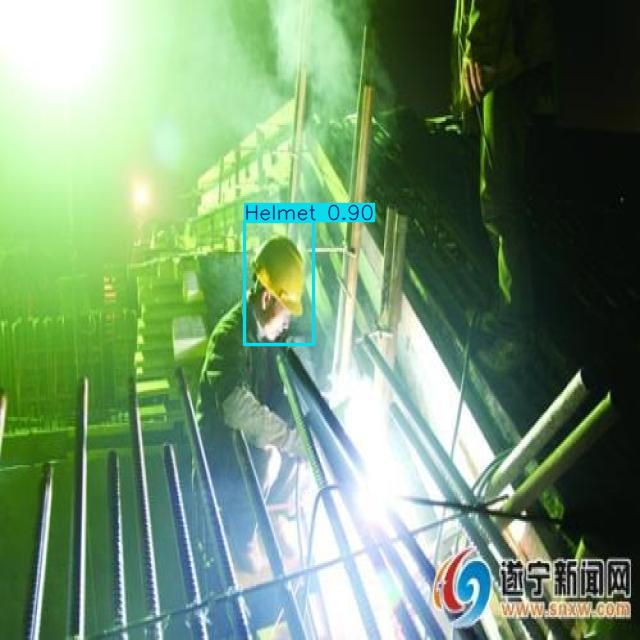

In [7]:
# Directorio de la imagen
imagen_dir = '/kaggle/working/Hard-Hat-Sample-3/test/images/000034_jpg.rf.b506e2589b466f8e3fe1239722065f36.jpg'

# Realizar una inferencia
model.predict(imagen_dir, save=True, imgsz=640, conf=0.3, show_boxes=True, show_labels=True)

# Mostrar imagen sobre la cual se hizo inferencia
Image(filename="/kaggle/working/runs/detect/predict/"+imagen_dir.rsplit('/', 1)[-1])

In [8]:
def descargar_imagen(image_url,num):

    # Specify the path and filename where you want to save the image
    download_path = "/kaggle/working/downloaded_image"+str(num)+".jpg"

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    # Make a GET request to download the image
    response = requests.get(image_url, headers=headers, allow_redirects=True)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Open a file in binary mode to write the image data
        with open(download_path, "wb") as file:
            # Write the image data to the file
            file.write(response.content)
        print("Image downloaded successfully.")
    else:
        print("Error downloading the image.")

In [13]:
descargar_imagen("https://img.freepik.com/premium-photo/try-become-man-value-shot-young-man-working-construction-site-outside_590464-64393.jpg",1)

Image downloaded successfully.



image 1/1 /kaggle/working/downloaded_image1.jpg: 640x512 1 Helmet, 89.4ms
Speed: 3.4ms preprocess, 89.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict


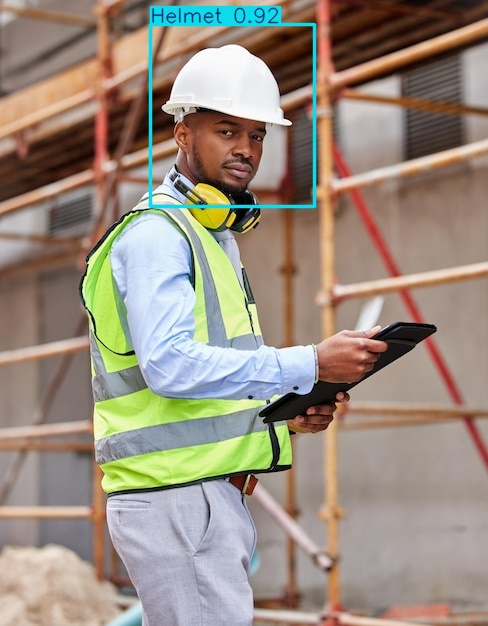

In [23]:
# Directorio de la imagen
imagen_dir = '/kaggle/working/downloaded_image1.jpg'

# Realizar una inferencia
model.predict(imagen_dir, save=True, imgsz=640, conf=0.3, show_boxes=True, show_labels=True)

# Mostrar imagen sobre la cual se hizo inferencia
Image(filename="/kaggle/working/runs/detect/predict/"+imagen_dir.rsplit('/', 1)[-1])